<h1><center>Machine Learning in Public Policy: Homework #1</center></h1>
<font size=3><i><center>Ziyu Ye<br>ziyuye@uchicago.edu</center><font>

<h2><center>Problem 1: Data Acquisition and Analysis</center></h2>
<font size=3>
This problem deals with crime reporting data from Chicago. Your task is to download data about Crime Reports from the <a href="https://data.cityofchicago.org/">Chicago Open Data Portal</a> and analyze it to better understand what type of <u>crimes</u> get reported in what (type of) <u>neighborhoods</u>.<br>

You should use Python to do following tasks:
1. Download reported crime data from the Chicago open data portal for 2017 and 2018.

2. Generate summary statistics for the crime reports data including but not limited to <u>number of crimes of each type</u>, <u>how they change over time</u>, and their <u>difference by neighborhood</u>. Please use a combination of tables and graphs to present these summary stats.
<font>

### 1.1 Data Acquisition

In [1]:
import wget
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [62]:
np.set_printoptions(suppress=True)

In [3]:
def url_to_df(url):
    '''
    Get the file from a certain url and convert it to a dataframe.
    '''
    filename = wget.download(url)
    result = pd.read_csv(filename)
    return result

In [4]:
url_17 = 'https://data.cityofchicago.org/views/d62x-nvdr/rows.csv?accessType=Download'
url_18 = 'https://data.cityofchicago.org/views/3i3m-jwuy/rows.csv?accessType=Download'
crime_17, crime_18 = url_to_df(url_17), url_to_df(url_18)

In [5]:
crime_all = pd.concat([crime_17, crime_18], axis=0)

### 1.2 Data Analysis

#### 1.2.0 Preprocessing

In [6]:
crime_17.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.680960e+05,268096.000000,268095.000000,268095.000000,268096.000000,2.649810e+05,2.649810e+05,268096.0,264981.000000,264981.000000
mean,1.098178e+07,1145.520664,11.226147,23.276909,36.549624,1.164943e+06,1.886630e+06,2017.0,41.844502,-87.670219
std,5.617922e+05,699.704075,6.988530,14.147735,21.406727,1.611740e+04,3.126971e+04,0.0,0.085992,0.058676
min,2.305900e+04,111.000000,1.000000,1.000000,0.000000,1.094231e+06,1.813909e+06,2017.0,41.644606,-87.928909
25%,1.090950e+07,611.000000,6.000000,10.000000,23.000000,1.153371e+06,1.859405e+06,2017.0,41.769599,-87.712290
50%,1.101164e+07,1031.000000,10.000000,24.000000,32.000000,1.166686e+06,1.894136e+06,2017.0,41.865300,-87.664013
75%,1.110766e+07,1722.000000,17.000000,35.000000,53.000000,1.176502e+06,1.909088e+06,2017.0,41.906373,-87.627760
max,1.164513e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2017.0,42.022671,-87.524529


In [7]:
crime_18.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.662780e+05,266278.000000,266278.000000,266275.000000,266276.000000,2.635430e+05,2.635430e+05,266278.0,263543.000000,263543.000000
mean,1.135123e+07,1142.290107,11.194473,23.439189,36.469505,1.165009e+06,1.886592e+06,2018.0,41.844396,-87.669976
std,5.371005e+05,696.107156,6.953078,14.094291,21.454446,1.603604e+04,3.118447e+04,0.0,0.085755,0.058385
min,2.375700e+04,111.000000,1.000000,1.000000,0.000000,1.092706e+06,1.813897e+06,2018.0,41.644590,-87.934273
25%,1.128624e+07,611.000000,6.000000,10.000000,23.000000,1.153337e+06,1.859421e+06,2018.0,41.769662,-87.712382
50%,1.137532e+07,1031.000000,10.000000,24.000000,32.000000,1.166911e+06,1.894243e+06,2018.0,41.865575,-87.663281
75%,1.146447e+07,1723.000000,17.000000,35.000000,53.000000,1.176461e+06,1.908735e+06,2018.0,41.905323,-87.627842
max,1.164817e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2018.0,42.022671,-87.524529


In [8]:
crime_all.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,5.343740e+05,534374.000000,534373.000000,534370.000000,534372.000000,5.285240e+05,5.285240e+05,534374.000000,528524.000000,528524.000000
mean,1.116588e+07,1143.910881,11.210364,23.357773,36.509701,1.164976e+06,1.886611e+06,2017.498299,41.844449,-87.670098
std,5.798378e+05,697.915267,6.970899,14.121349,21.430536,1.607690e+04,3.122721e+04,0.499998,0.085874,0.058531
min,2.305900e+04,111.000000,1.000000,1.000000,0.000000,1.092706e+06,1.813897e+06,2017.000000,41.644590,-87.934273
25%,1.101034e+07,611.000000,6.000000,10.000000,23.000000,1.153356e+06,1.859410e+06,2017.000000,41.769634,-87.712334
50%,1.119587e+07,1031.000000,10.000000,24.000000,32.000000,1.166794e+06,1.894186e+06,2017.000000,41.865440,-87.663650
75%,1.137570e+07,1723.000000,17.000000,35.000000,53.000000,1.176477e+06,1.908936e+06,2018.000000,41.905840,-87.627799
max,1.164817e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2018.000000,42.022671,-87.524529


In [9]:
crime_all.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

#### 1.2.1 Number of Crimes of Each Type

In [10]:
type_17 = crime_17['Primary Type'].value_counts()
type_18 = crime_18['Primary Type'].value_counts()
type_all = crime_all['Primary Type'].value_counts()

In [11]:
crime_type = pd.DataFrame({'2017':type_17, '2018':type_18, 'total':type_all})

In [12]:
crime_type

,2017,2018,total
ARSON,444,372,816
ASSAULT,19303,20377,39680
BATTERY,49214,49781,98995
BURGLARY,13000,11730,24730
CONCEALED CARRY LICENSE VIOLATION,69,149,218
CRIM SEXUAL ASSAULT,1628,1628,3256
CRIMINAL DAMAGE,29042,27806,56848
CRIMINAL TRESPASS,6812,6904,13716
DECEPTIVE PRACTICE,19028,18736,37764
GAMBLING,191,201,392


#### 1.2.2 Changes of Crimes Over Time

In [13]:
crime_type['change'] = crime_type['2018'] - crime_type['2017']

In [14]:
crime_type

,2017,2018,total,change
ARSON,444,372,816,-72
ASSAULT,19303,20377,39680,1074
BATTERY,49214,49781,98995,567
BURGLARY,13000,11730,24730,-1270
CONCEALED CARRY LICENSE VIOLATION,69,149,218,80
CRIM SEXUAL ASSAULT,1628,1628,3256,0
CRIMINAL DAMAGE,29042,27806,56848,-1236
CRIMINAL TRESPASS,6812,6904,13716,92
DECEPTIVE PRACTICE,19028,18736,37764,-292
GAMBLING,191,201,392,10


#### 1.2.3 Difference of Crimes by Neighborhood

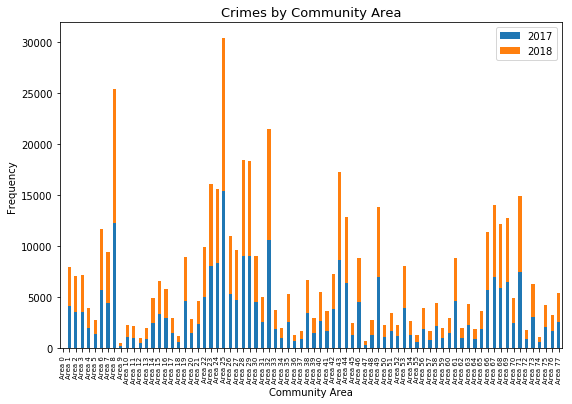

In [15]:
# visualize service requests by wards
data = crime_all.groupby(['Community Area', 'Year']).size().unstack()
data.plot(kind='bar', stacked=True, figsize=(9,6))
ax = plt.gca()
ax.set_xticklabels(["Area {:.0f}".format(i) for i in data.index], fontsize=7)

plt.title('Crimes by Community Area', fontsize=13)
plt.xlabel('Community Area')
plt.ylabel('Frequency')
plt.legend(('2017', '2018'))

<h2><center>Problem 2: Data Augmentations and APIs</center></h2>
<font size=3>
All of the crime data you just analyzed have a block address and lat/long fields. The task now is to augment that data with <a href="https://www.census.gov/programs-surveys/acs/">American Community Survey</a> data. For each crime report, use one of the census APIs to get some additional data (at least 3-4 useful variables) about the <u>block or zipcode</u> where the crime report came from. This could include information about demographics of the block or zipcode (race, income, family size, etc.).<br>

Based on this augmented data, provide some descriptive statistics to describe:
1. What types of blocks have reports of `Battery`?
2. What types of blocks get `Homicide`?
3. Does that change over time in the data you collected?
4. What is the difference in blocks that get `Deceptive Practice` v.s. `Sex Offense`? 
<font>

### 2.0 Data Preprocessing using API

> <b>Acknowledgement</b>: The usage of API and query constrution by tract used in this section credits to <a href="https://github.com/rosegao/CAPP-30254-Machine-Learning">Rose Gao's github repository</a>. 

> <b>Note</b>: For this problem, I define the <b>type</b> of blocks by <b>sociological features</b> of blocks from the ACS dataset. The detailed choice of those features are illustrated as follow:

#### 2.0.0 Census Data Acquisition

In [18]:
import cenpy as c

In [19]:
dataset = 'ACSDT5Y2017'
c.explorer.explain(dataset)

{'ACS 5-Year Detailed Tables': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population.  Summary files include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts (114th congress), all counties, all places, and all tracts and block groups.  Summary files contain the most detailed cross-tabulations, many of which are published down to block groups. The data are population and housing counts. There are over 64,000 variables in this dataset.'}

In [20]:
conn = c.base.Connection(dataset)

> As we will be dealing with crime categories including `Battery`, `Homicide`, `Deceptive Practice`, and `Sex Offense`, it would be better to choose features mostly associated with these crimes. Normally we should conduct a machine learning algorithm to find out the features, but that would be too time-consuming this time. Instead, I select some features suggested from scholars obtained by regression (<a href="https://link.springer.com/article/10.1007/BF02761491">İmrohoroğlu et al, 2006</a>; <a href="https://ideas.repec.org/p/mib/wpaper/63.html">Buonanno, 2003</a>), including:
* `Social Inequality`: proxied by ACS variable `B19083`;
* `Income Level`: proxied by ACS variable `B19019`;
* `Education`: proxied by ACS variable `B15003`;
* `Race Composition`: proxied by ACS variable `B01001`(total), `B01001A`(white), `B01001B`(black), `B01001D`(asian), `B01001I`(hispanic or latino).

In [21]:
feature_description = []
variables = ['B19083_001E', 'B19019_001E', 'B23006_001E', 'B23006_023E','B01001_001E', 
             'B01001A_001E', 'B01001B_001E','B01001D_001E', 'B01001I_001E']

for i in variables:
    feature_description.append((i, conn.variables.loc[i]['concept']))

pd.DataFrame(feature_description, columns=['features', 'concept'])['concept']

0                      GINI INDEX OF INCOME INEQUALITY
1    MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...
2    EDUCATIONAL ATTAINMENT BY EMPLOYMENT STATUS FO...
3    EDUCATIONAL ATTAINMENT BY EMPLOYMENT STATUS FO...
4                                           SEX BY AGE
5                             SEX BY AGE (WHITE ALONE)
6         SEX BY AGE (BLACK OR AFRICAN AMERICAN ALONE)
7                             SEX BY AGE (ASIAN ALONE)
8                      SEX BY AGE (HISPANIC OR LATINO)
Name: concept, dtype: object

#### 2.0.1 Incorporating Tracts into Census Data

In [22]:
geo_unit = 'tract:*'
geo_filter = {'state': '17', 'county': '031'}
census = conn.query(variables, geo_unit=geo_unit, geo_filter=geo_filter)

In [23]:
variables.append('tract')
census = census[list(variables)]
census.columns = ['gini_index', 'median_income', 'total_educ', 'higher_educ', 'total_pop',
                  'white_pop', 'black_pop', 'asian_pop', 'latino_pop', 'tract']

In [25]:
census = census.astype({'gini_index':float, 'median_income':float, 'total_educ':int, 
                        'higher_educ':int, 'total_pop':int,'white_pop':int, 'black_pop':int, 
                        'asian_pop':int,'latino_pop':int, 'tract':int})

In [26]:
census.head()

,gini_index,median_income,total_educ,higher_educ,total_pop,white_pop,black_pop,asian_pop,latino_pop,tract
0,0.3651,84863.0,3002,1059,5541,5032,51,0,1797,561000
1,0.4801,57045.0,965,147,1600,1094,61,11,1006,640100
2,0.4210,44063.0,3122,91,6464,2842,110,3,6189,630500
3,0.3760,24972.0,1084,40,2307,1255,346,0,1801,611100
4,0.3468,35016.0,1647,87,3298,2012,88,0,3076,611400


#### 2.0.2 Generate Meaningful Statistics from the Census Data

In [35]:
census_original = census.copy(deep=True)

In [36]:
census['higher_educ_ratio'] = census['higher_educ'] / census['total_educ']
census['white_pop_ratio'] = census['white_pop'] / census['total_pop']
census['black_pop_ratio'] = census['black_pop'] / census['total_pop']
census['asian_pop_ratio'] = census['asian_pop'] / census['total_pop']
census['latino_pop_ratio'] = census['latino_pop'] / census['total_pop']
census = census.drop(['total_educ', 'higher_educ', 'total_pop', 'white_pop',
                      'black_pop', 'asian_pop', 'latino_pop'], axis=1)

In [37]:
census.head()

,gini_index,median_income,tract,higher_educ_ratio,white_pop_ratio,black_pop_ratio,asian_pop_ratio,latino_pop_ratio
0,0.3651,84863.0,561000,0.352765,0.908139,0.009204,0.000000,0.324310
1,0.4801,57045.0,640100,0.152332,0.683750,0.038125,0.006875,0.628750
2,0.4210,44063.0,630500,0.029148,0.439666,0.017017,0.000464,0.957457
3,0.3760,24972.0,611100,0.036900,0.543997,0.149978,0.000000,0.780668
4,0.3468,35016.0,611400,0.052823,0.610067,0.026683,0.000000,0.932686


In [40]:
census.describe()

,gini_index,median_income,tract,higher_educ_ratio,white_pop_ratio,black_pop_ratio,asian_pop_ratio,latino_pop_ratio
count,1.319000e+03,1.319000e+03,1319.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,-2.021733e+06,-2.971183e+06,565847.085671,0.379129,0.529637,0.290126,0.062735,0.235980
std,3.667090e+07,4.488249e+07,294669.246393,0.251892,0.317421,0.367497,0.093302,0.264474
min,-6.666667e+08,-6.666667e+08,10100.000000,0.006711,0.000000,0.000000,0.000000,0.000000
25%,4.011500e-01,3.853100e+04,252101.500000,0.160762,0.246631,0.020030,0.002713,0.048026
50%,4.358000e-01,5.492200e+04,720400.000000,0.317154,0.605206,0.063821,0.026805,0.118406
75%,4.844000e-01,7.861500e+04,817250.000000,0.561004,0.809837,0.601184,0.083196,0.332355
max,6.896000e-01,2.500010e+05,990000.000000,0.950827,0.994086,1.000000,0.898402,0.996365


In [41]:
census = census[census['median_income'] > 0]

#### 2.0.3 Build Connections for Census Data and Crime Data

> The <a href="https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik">Boundary Census Tracts Data</a> from ACS contains features of `tracts` and `community area`. Also, as previously established, the <u><font color="blue">Census Data</font></u> contains feature of `tracts`, and our <u><font color="blue">Crime Data</font></u> contains the feature of `community area`. Therefore, it would be convenient to build connection for census data and crime data using the tracts data as the intermediary.

> <B>Step 1</B>: We need to download the <a href="https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik">Boundary Census Tracts Data</a> and transform it into a dataframe.

In [97]:
url_tracts = 'https://data.cityofchicago.org/views/74p9-q2aq/rows.csv?accessType=Download'
tracts_data = url_to_df(url_tracts)
tracts_data.columns

Index(['the_geom', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'COMMAREA', 'COMMAREA_N', 'NOTES'],
      dtype='object')

In [101]:
tracts_data = tracts_data[['TRACTCE10', 'COMMAREA']]
tracts_data.columns = ['tract', 'Community Area']

> <B>Step 2</B>: Let's merge the new <u><font color="blue">Tracts Data</font></u> with the <u><font color="blue">Census Data</font></u> containing features.

In [102]:
census_tracts = pd.merge(census, tracts_data, on=['tract'])
census_tracts.columns

Index(['gini_index', 'median_income', 'tract', 'higher_educ_ratio',
       'white_pop_ratio', 'black_pop_ratio', 'asian_pop_ratio',
       'latino_pop_ratio', 'Community Area'],
      dtype='object')

> <B>Step 3</B>: Finally, we can merge the <u><font color="blue">Census Data</font></u> with our <u><font color="blue">Crime Data</font></u>.

In [60]:
crime_census = pd.merge(crime_all, census_tracts, on=['Community Area'])
crime_census.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,gini_index,median_income,tract,higher_educ_ratio,white_pop_ratio,black_pop_ratio,asian_pop_ratio,latino_pop_ratio
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,-87.699714,"(42.012293397, -87.699714109)",0.5296,39282.0,20601,0.38768,0.599184,0.102447,0.228548,0.063132


In [64]:
crime_census.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'gini_index', 'median_income', 'tract', 'higher_educ_ratio',
       'white_pop_ratio', 'black_pop_ratio', 'asian_pop_ratio',
       'latino_pop_ratio'],
      dtype='object')

### 2.1 Block Features with Crime `Battery`

In [75]:
crime_census_original = crime_census.copy(deep=True)

In [79]:
crime_census['Battery'] = crime_census['Primary Type']
crime_census.loc[crime_census['Primary Type'] =='BATTERY', 'Battery'] = 1
crime_census.loc[crime_census['Primary Type'] !='BATTERY', 'Battery'] = 0

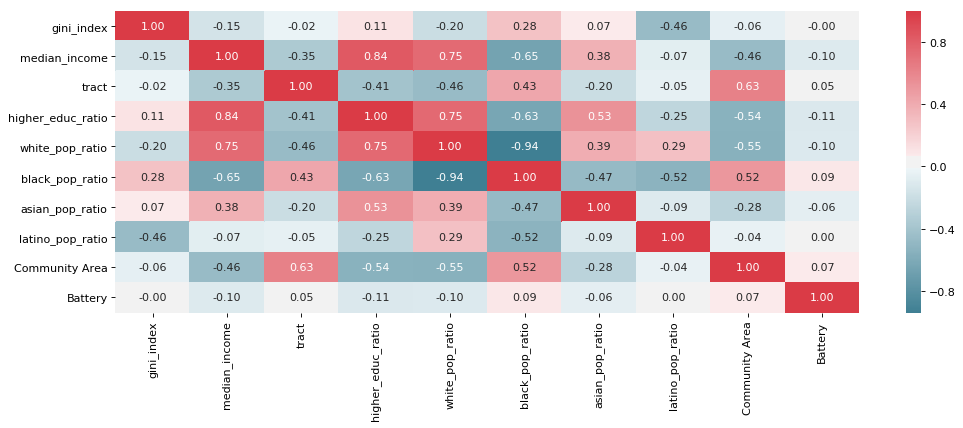

In [95]:
corr_vars = list(census_tracts.columns)
corr_vars.append('Battery')
corr_battery = crime_census[corr_vars].corr()
fig = plt.figure(figsize=(15, 5), dpi=80) 
sns.heatmap(corr_battery, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 10, as_cmap=True))

> <b>Findings</b>: By investigating the last column of the heat map, we should say that the crime `Battery` <b>does not correlate much</b> with these sociological features. Generally speaking, higher `median income`, `higher education ratio` and `white population ratio` are observed to be associated with lower `Battery` crimes, while higher `black population ratio` are observed to be associated with higher `Battery` crimes.

> <b>Note</b>: Frankly, to answer this question, we would only use the last column of the heatmap, which makes the whole heatmap seems to be too miscellaneous. However, considering that some features may have endogeneity or interact with each other (e.g. `higher education ratio` is greatly associated with `median income`, and `white population ratio` is much negatively associated with `black population ratio`, yet such a pattern is not found with Asians and Hispanic or Latinos), so it may still be helpful to present the whole map.

### 2.2 Block Features with Crime ` Homicide`

In [104]:
crime_census['Homicide'] = crime_census['Primary Type']
crime_census.loc[crime_census['Primary Type'] =='HOMICIDE', 'Homicide'] = 1
crime_census.loc[crime_census['Primary Type'] !='HOMICIDE', 'Homicide'] = 0

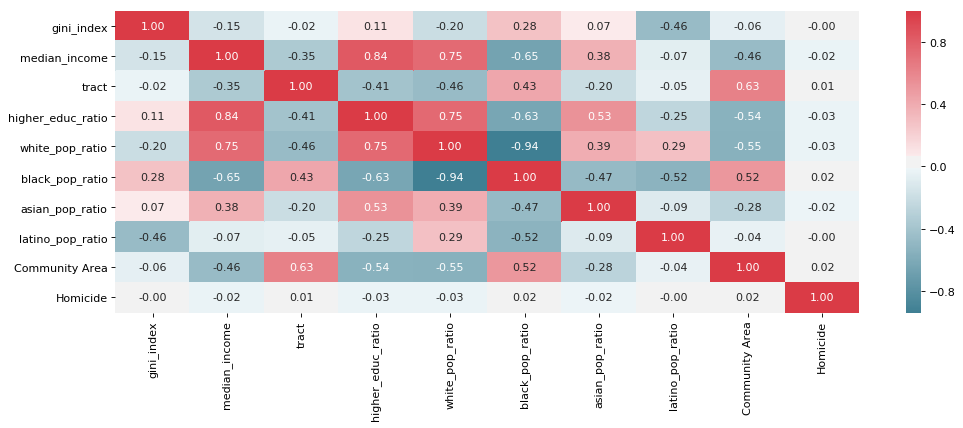

In [105]:
corr_vars = list(census_tracts.columns)
corr_vars.append('Homicide')
corr_battery = crime_census[corr_vars].corr()
fig = plt.figure(figsize=(15, 5), dpi=80) 
sns.heatmap(corr_battery, annot=True, fmt='.2f', cmap=sns.diverging_palette(220, 10, as_cmap=True))

> <b>Findings</b>: By investigating the last column of the heat map, we should say that the crime `Homicide` has pretty <b>much lower correlation</b> with these sociological features. This result is not as what I expect - for example, normally we would expect homicide to happen in poorer places or places with higher level of inequality, but given the correlation heatmap, such correlations are not presented. Therefore, to further investigate this problem, we should do more advanced machine learning analysis - let's retain it to the next assignment! : )

### 2.3 Change of Data Over Time

In [ ]:
crime_census.groupby

### 2.4 Difference in Blocks with `Deceptive Practice` v.s. `Sex Offense`

<h2><center>Problem 3: Analysis and Communications</center></h2>
<font size=3>
Based on the data you have from 1 and 2:
    
1. Describe how crime has changed in Chicago from 2017 to 2018?
2. One of the alderman candidates from recent elections has some crime statistics on his <a href="https://www.ringer4results.com/node/8">website</a>.   
   a) Are these statistics correct?
   b) Could they be misleading or would you agree with the conclusions he’s drawing? Why or why not?
3. As you know, there will be a new mayor in Chicago very soon. Based on these summary statistics, provide 5 key findings to the new mayor’s office about crime in Chicago and what they should focus on in order to deal with crime in Chicago.
4. What are some of the key caveats of your recommendations and limitations of the analysis that you just did? 
<font>

### 3.1 Crime Change in Chicago from 2017 to 2018

### 3.2 Evaluation of Ranger's Statistics

### 3.3 Five Key Findings for the New Mayor

### 3.4 Caveats of the Recommendation and Limitations of the Analysis

<h2><center>Problem 4: Analysis and Communications</center></h2>
<font size=3>
Assume you are running the 911 call center for Chicago. You get a call from someone at 2111 S Michigan Ave:
    
1. Of the types of crimes you have data for, which crime type is the most likely given the call came from 2111 S Michigan Ave? What are the probabilities for each type of request?
2. Let’s now assume that a call comes in about Theft. Which is more likely – that the call came from Garfield Park or Uptown? How much more or less likely is it to be from Garfield Park vs Uptown?
3. Now assume that you don’t have access to all the raw data and you know the following things: There are a total of 1000 calls, 600 from Garfield Park and 400 from Uptown. Of the 600 calls from Garfield Park, 100 of them are about Battery. Of the 400 calls from Uptown, 160 are about Battery. If a call comes about Battery, how much more/less likely is it that the call came from Garfield Park versus Uptown?
<font>

### 4.1 Crime Type and Its Probability in 2111 S Michigan Ave

In [157]:
round(crime_census[crime_census['Block']=='021XX S MICHIGAN AVE']['Primary Type'].value_counts(normalize=True), 3)

BATTERY                   0.267
OTHER OFFENSE             0.217
DECEPTIVE PRACTICE        0.100
THEFT                     0.100
ASSAULT                   0.100
CRIMINAL DAMAGE           0.100
MOTOR VEHICLE THEFT       0.033
ROBBERY                   0.033
BURGLARY                  0.017
PUBLIC PEACE VIOLATION    0.017
CRIMINAL TRESPASS         0.017
Name: Primary Type, dtype: float64

> <b>Conclusion</b>: Given the above form for the probability of crimes happened around the block of `2111 S Michigan Avenue`, the crime with the highest probability is `Battery`.

### 4.2 Theft in Garfield Park v.s. Uptown

`P(crime_from_Garfield | theft)` = `P(battery | crime_from_Garfield)` * `P(crime_from_Garfield)` / `P(theft)`   
`P(crime_from_Uptown | theft)` = `P(battery | crime_from_Uptown)` * `P(crime_from_Uptown)` / `P(theft)`   

In [140]:
garfield_crime = crime_census[crime_census['Community Area'].isin([26, 27])]
uptown_crime = crime_census[crime_census['Community Area'] == 3]
n_G_crime = garfield.ID.count()
n_U_crime = uptown_crime.ID.count()
n_total_crime = n_G_crime + n_U_crime

garfield_theft = garfield_crime[garfield_crime['Primary Type'] == 'THEFT']
uptown_theft = uptown_crime[uptown_crime['Primary Type'] == 'THEFT']
n_G_theft = garfield_theft.ID.count()
n_U_theft = uptown_theft.ID.count()
n_total_theft = n_G_theft + n_U_theft

In [143]:
p_theft = n_total_theft / n_total_crime
p_G = n_G_crime / n_total_crime
p_U = n_U_crime / n_total_crime
p_theft = n_U_crime / n_total_crime
p_theft_given_G = n_G_theft / n_G_crime
p_theft_given_U = n_U_theft / n_U_crime

p_G_given_theft = (p_G * p_theft_given_G) / p_theft
p_U_given_theft = (p_U * p_theft_given_U) / p_theft

In [150]:
print('The probability for a crime from Garfield Park given it is about theft:', round(p_G_given_theft, 3))
print('The probability for a crime from Uptown given it is about theft:', round(p_U_given_theft, 3))

The probability for a crime from Garfield Park given it is about theft: 0.319
The probability for a crime from Uptown given it is about theft: 0.272


In [149]:
p_difference_theft = p_G_given_theft - p_U_given_theft
round(p_difference_theft, 3)

0.047

> <b>Conclusion</b>: Therefore, by <b>Bayesian Theorem</b>, we can say that given a crime is about `theft`, it is more likely to be come from `Garfield Park`. Specifically, the likelihood for it to be come from `Garfield Park` is `4.7%` higher than from `Uptown`.

### 4.3 Battery in Garfield Park v.s. Uptown

`P(call_from_Garfield | battery)` = `P(battery | call_from_Garfield)` * `P(call_from_Garfield)` / `P(battery)`   
`P(call_from_Uptown | battery)` = `P(battery | call_from_Uptown)` * `P(call_from_Uptown)` / `P(battery)`   

In [124]:
p_battery = (100 + 160) / 1000
_p_G = 600 / 1000
_p_U = 400 / 1000
p_battery_given_G = 100 / 600
p_battery_given_U = 160 / 400
p_G_given_battery = (_p_G * p_battery_given_G) / p_battery
p_U_given_battery = (_p_U * p_battery_given_U) / p_battery

print('The probability for a call from Garfield Park given it is about battery:', round(p_G_given_battery, 3))
print('The probability for a call from Uptown given it is about battery:', round(p_U_given_battery, 3))

The probability for a call from Garfield Park given it is about battery: 0.385
The probability for a call from Uptown given it is about battery: 0.615


In [147]:
p_difference_battery = p_U_given_battery - p_G_given_battery
round(p_difference_battery, 3)

0.231

> <b>Conclusion</b>: Therefore, by <b>Bayesian Theorem</b>, we can say that given a call is about `battery`, it is more likely to be come from `Uptown`. Specifically, the likelihood for it to be come from `Uptown` is `23.1%` higher than from `Garfield Park`.